In [1]:
import matplotlib.pyplot as pl
import xarray as xr
import numpy as np
from matplotlib.colors import LogNorm

pl.rcParams['xtick.labelsize'] = 12
pl.rcParams['ytick.labelsize'] = 12
pl.rcParams['axes.labelsize'] = 16



def powspace(start, stop, power, num):
    start = np.power(start, 1/float(power))
    stop = np.power(stop, 1/float(power))
    return np.power( np.linspace(start, stop, num=num), power)


MHH_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/2D_outputs/Feb_2nd/zi_touze.xy.nc',decode_times=False)
MHH_2d_stacked=MHH_2d.stack(xy=('x','y'))

SAM_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_UW_results/Feb2/EUREC4A_2Feb_1024sqx151_150m_M2005_RRTM_Lagtraj_NC400_km_2D_1024_HOURLY_CONCAT.nc',decode_times=True)
SAM_2d_stacked=SAM_2d[['MLD']].stack(xy=('x','y'))
SAM_NOAA_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_NOAA_results/NOAA_SAM_EUREC4A_2020-02-02_1024sqx151_150m_FY2M_RRTM_NA478.001.hera.2023-12-23-01h08m58s/OUT_2D/NOAA_SAM_EUREC4A_2020-02-02_1024sqx151_150m_FY2M_RRTM_NA478.001_eurec4a_20200202.kpt_2D_0300s.nc',decode_times=True)
SAM_NOAA_2d_stacked=SAM_NOAA_2d[['HMIX']].stack(xy=('x','y'))
DALES_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/DALES_Results/Feb2_1024x1024_150m/fieldint.lwp.001.nc',decode_times=False)
MONC_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/MONC_results/d20200202_diagnostic_mlh.nc',decode_times=False)
MONC_2d_stacked=MONC_2d[['mlh_level']].stack(xy=('x','y'))





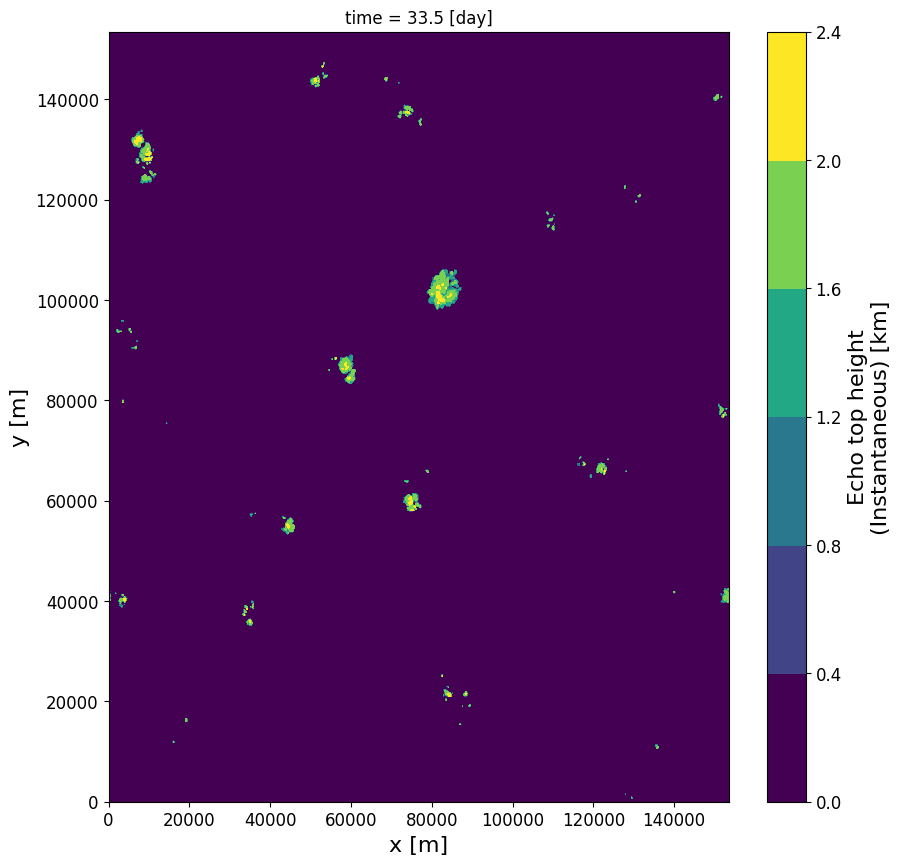

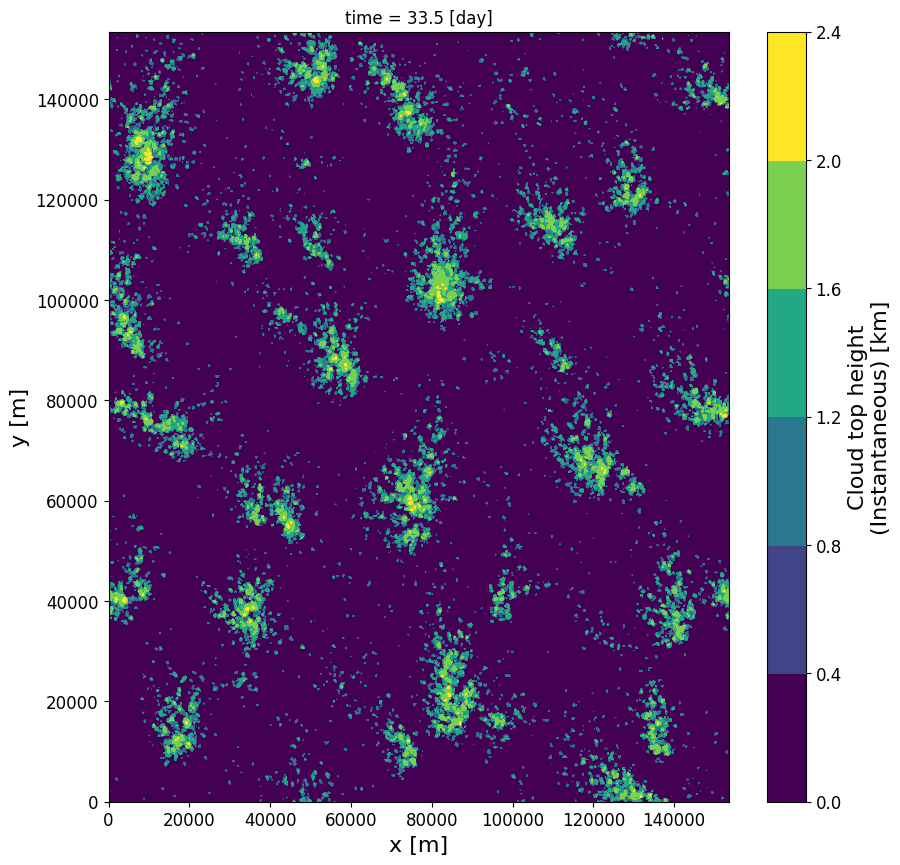

In [6]:
pl.figure(figsize=(10,10))
SAM_2d['ZE'].isel(time=60).plot.contourf()
pl.figure(figsize=(10,10))
SAM_2d['ZC'].isel(time=60).plot.contourf()

In [2]:
MHH_2d_stacked['time']=MHH_2d_stacked['time']/3600
df=MHH_2d_stacked.isel(time=slice(40*12,79*12,24)).to_dataframe()
df['time']=df.index.get_level_values('time')
df['time']=df['time'].astype('int64')

SAM_2d_stacked['time']=(SAM_2d_stacked['time']-SAM_2d_stacked['time'][0])*24
df1=SAM_2d_stacked.isel(time=slice(40,79,2)).to_dataframe()
df1['time']=df1.index.get_level_values('time')
df1['time']=df1['time'].astype('int64')

SAM_NOAA_2d_stacked['time']=(SAM_NOAA_2d_stacked['time']-SAM_NOAA_2d_stacked['time'][0])*24
df2=SAM_NOAA_2d_stacked.isel(time=slice(40*12,79*12,24)).to_dataframe()
df2['time']=df2.index.get_level_values('time')
df2['time']=df2['time'].astype('int64')

MONC_2d_stacked['time']=MONC_2d_stacked['time']/3600
df3=MONC_2d_stacked.isel(time=slice(40,79,2)).to_dataframe()
df3['time']=df3.index.get_level_values('time')
df3['time']=df3['time'].astype('int64')



/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning

[(0.0, 2000.0)]

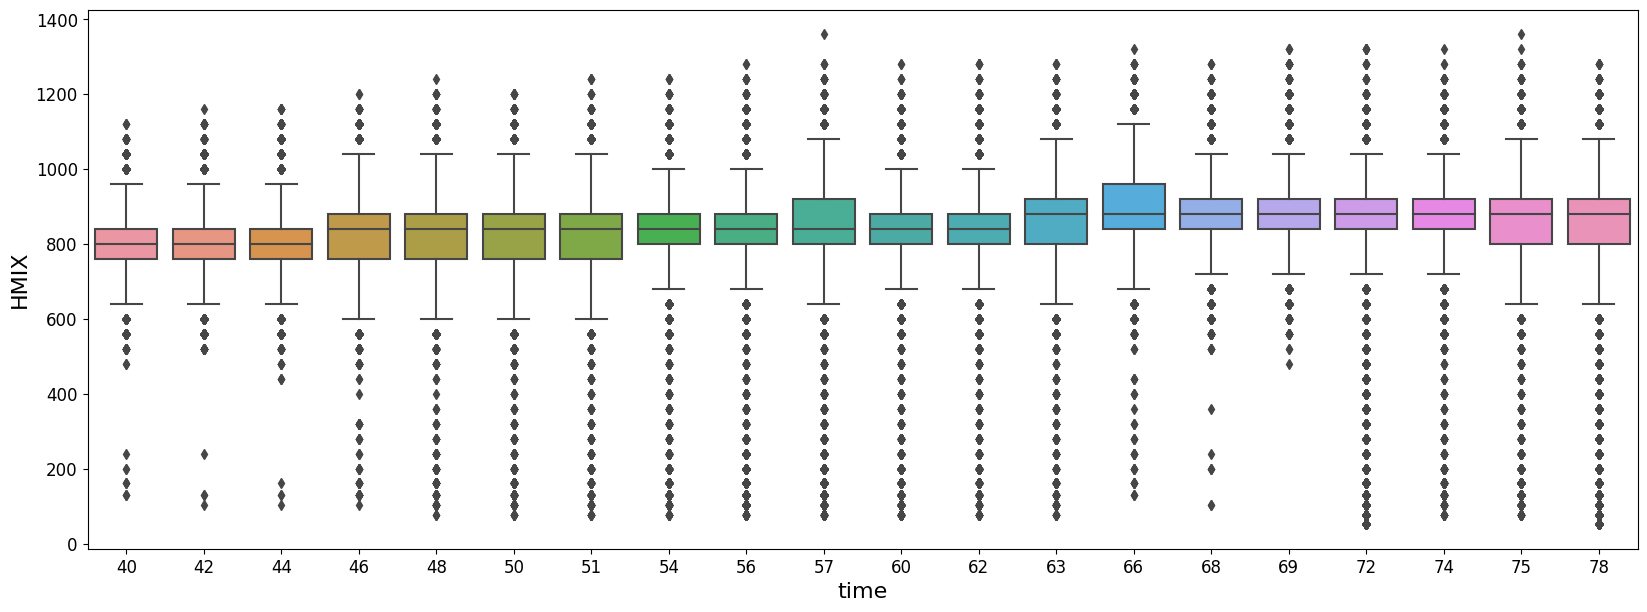

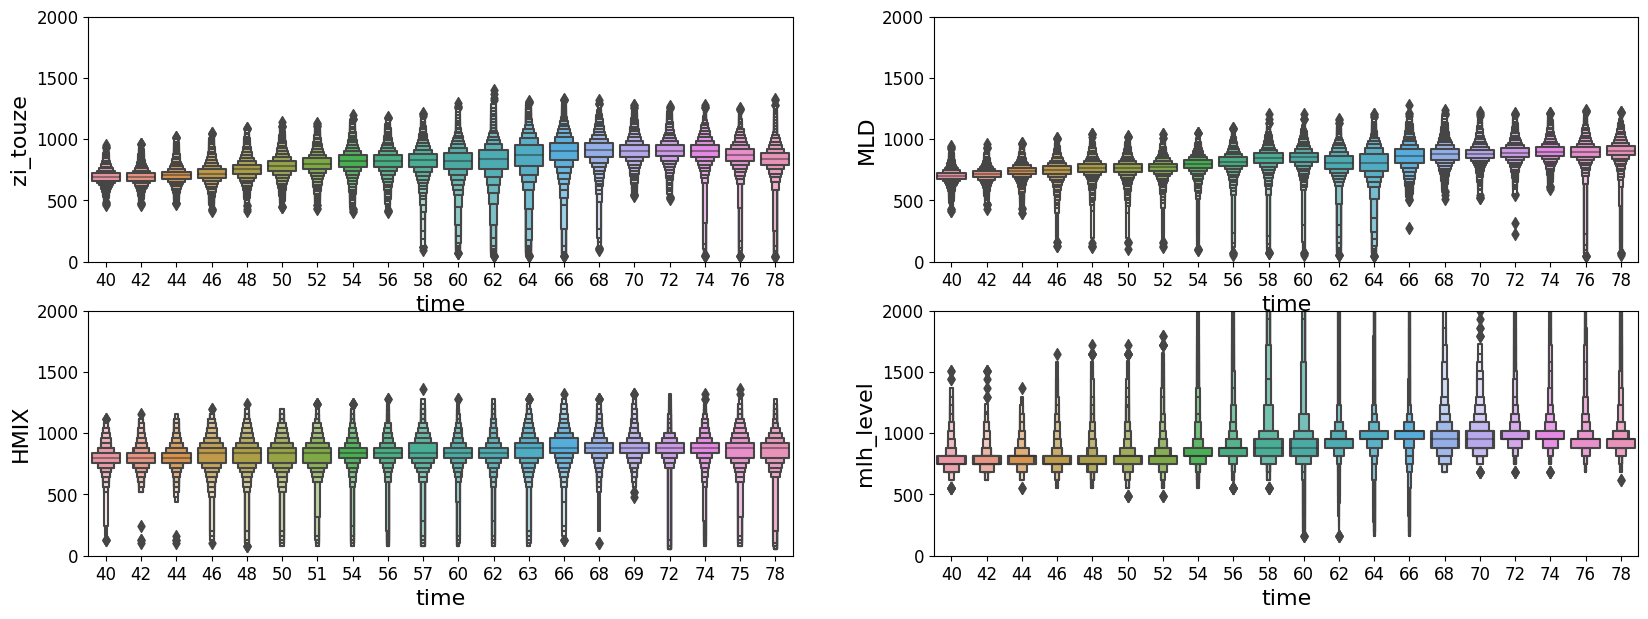

In [3]:
import seaborn as sns

pl.figure(figsize=(20, 7))
g=sns.boxplot(data=df2,y='HMIX',x='time')

pl.subplots(2,2,figsize=(20, 7))

pl.subplot(2,2,1)
g=sns.boxenplot(data=df,y='zi_touze',x='time',scale='area')
g.set(ylim=(0,2000))

pl.subplot(2,2,2)
g=sns.boxenplot(data=df1,y='MLD',x='time',scale='area')
g.set(ylim=(0,2000))


pl.subplot(2,2,3)
g=sns.boxenplot(data=df2,y='HMIX',x='time',scale='area')
g.set(ylim=(0,2000))

pl.subplot(2,2,4)
g=sns.boxenplot(data=df3,y='mlh_level',x='time',scale='area')
g.set(ylim=(0,2000))

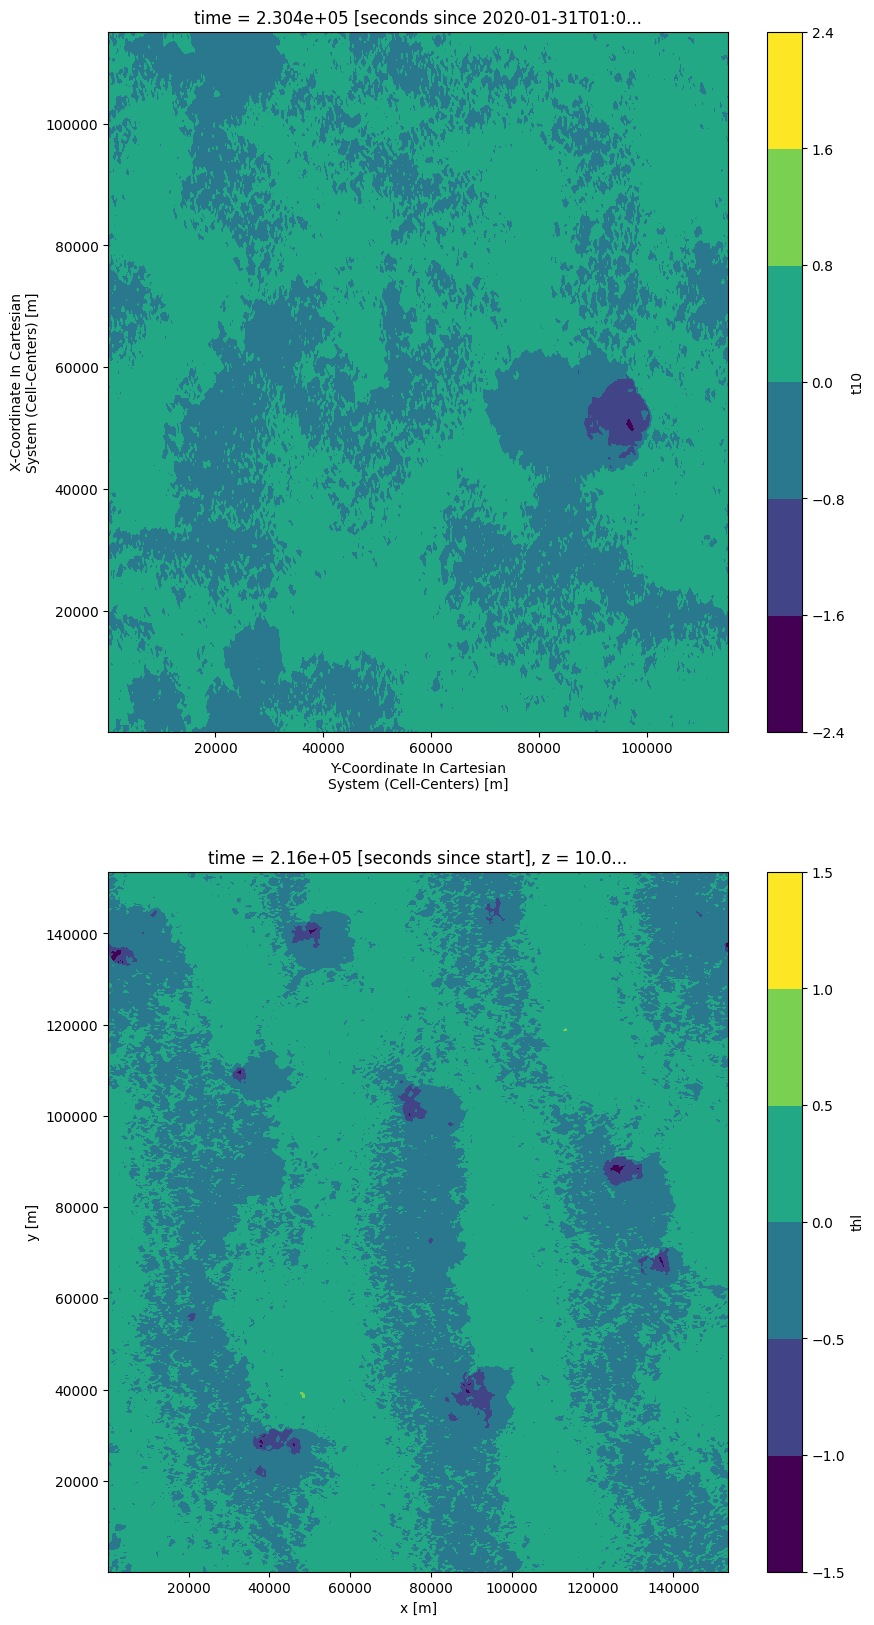

In [11]:
import xarray as xr
import matplotlib.pyplot as pl
import numpy as np

MONC_2d_cp=xr.open_dataset('/fs/ess/PFS0220/eurec4a/MONC_results/d20200202_diagnostic_cp.nc',decode_times=False)
MHH_2d_thl=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/2D_outputs/Feb_2nd/thl.xy.nc',decode_times=False).isel(z=0)
pl.subplots(2,1,figsize=(10, 20))
pl.subplot(2,1,1)
(MONC_2d_cp['t10']-MONC_2d_cp['t10'].mean(dim=['x','y'])).isel(time=64).plot.contourf(cmap='viridis',add_colorbar=True)
pl.subplot(2,1,2)
(MHH_2d_thl['thl'].isel(time=60*12)-MHH_2d_thl['thl'].isel(time=60*12).mean(dim=['x','y'])).plot.contourf(cmap='viridis',add_colorbar=True)

In [23]:
import sys
sys.path.append('/users/PFS0220/graghuna/microhh/microhh_lagtraj/microhh/python')
filepath='/fs/ess/PFS0220/eurec4a/microhh_results/2D_outputs/Feb_9th/'

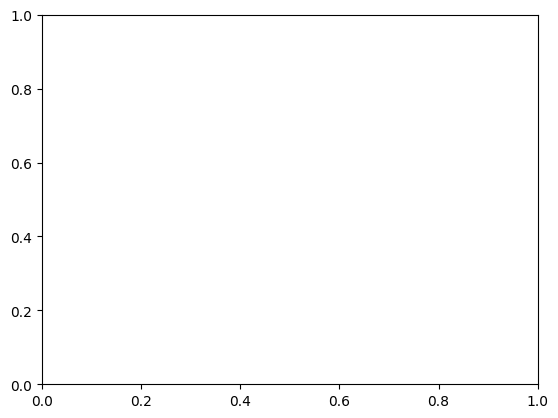

/tmp/ipykernel_3301511/3456741146.py:29: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  CS = ax.contourf(x/1000,y/1000,(variable[i,:,:]-np.mean(variable[i,:,:])),levels=levs,cmap='viridis',add_colorbar=True)
Animation size has reached 21007320 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.
/tmp/ipykernel_3301511/3456741146.py:29: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  CS = ax.contourf(x/1000,y/1000,(variable[i,:,:]-np.mean(variable[i,:,:])),levels=levs,cmap='viridis',add_colorbar=True)


In [25]:
import numpy as np
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as pl
import math
import matplotlib.animation as manimation
from IPython.display import HTML
from matplotlib import rc
from matplotlib import cm
from datetime import datetime, timedelta

start_time=datetime(2020,2,6,00)

def retrieve_variable(variable_name,netcdf_path): #open corresponding netcdf file and read data
    all_data=xr.open_dataset(netcdf_path,decode_times=False)
    var=all_data[variable_name].isel(z=0).values
    variable=var
    x=all_data['x'].values
    y=all_data['y'].values
    t=all_data['time'].values
    return variable, x, y, t;   


def make_animation_contour(x,y,variable,nt):
    levs=np.linspace(-3,1,11)
    fig, ax = pl.subplots()
    def animate(i):
        ax.clear()
        CS = ax.contourf(x/1000,y/1000,(variable[i,:,:]-np.mean(variable[i,:,:])),levels=levs,cmap='viridis',add_colorbar=True)
        ax.set_title(f'time={start_time+timedelta(hours=hr1+i/12)}')
        ax.set_xlabel('X (km)')
        ax.set_ylabel('Y (km)')
        return ax;
        
    ani = manimation.FuncAnimation(fig,animate,frames=nt,repeat=False)
    pl.show()
    HTML(ani.to_jshtml())
    pl.rcParams["animation.html"] = "jshtml"
    return ani

directory_qlpath=filepath
#directory_qlpath='/fs/ess/PFS0220/LSM/SGP/SGP_20170509_12hrbefore/qlpath.nc'
qlpath,x,y,t = retrieve_variable('thl',directory_qlpath+'thl.xy.nc')

f = r"/fs/ess/PFS0220/eurec4a/animations/cold_pool_thl_feb9.gif"
#f = r"/fs/ess/PFS0220/LSM/animations/SGP_20170509_80m.gif"

hr1=45;hr2=100;
ani1=make_animation_contour(x,y,qlpath[np.absolute(t-hr1*3600).argmin():np.absolute(t-hr2*3600).argmin(),:,:],len(t[np.absolute(t-hr1*3600).argmin():np.absolute(t-hr2*3600).argmin()]))
writergif = manimation.PillowWriter(fps=6) 
ani1.save(f, writer=writergif)

In [2]:
import matplotlib.pyplot as pl
import xarray as xr
import numpy as np
from matplotlib.colors import LogNorm

pl.rcParams['xtick.labelsize'] = 12
pl.rcParams['ytick.labelsize'] = 12
pl.rcParams['axes.labelsize'] = 16
sim='Feb9'


def powspace(start, stop, power, num):
    start = np.power(start, 1/float(power))
    stop = np.power(stop, 1/float(power))
    return np.power( np.linspace(start, stop, num=num), power)

if sim=='Feb2':
    MHH_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/2D_outputs/Feb_2nd/thl.xy.nc',decode_times=False)
    MHH_2d_stacked=MHH_2d.isel(z=0).stack(xy=('x','y'))

    SAM_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_UW_results/Feb2/EUREC4A_2Feb_1024sqx151_150m_M2005_RRTM_Lagtraj_NC400_km_2D_1024_HOURLY_CONCAT.nc',decode_times=True)
    SAM_2d_stacked=SAM_2d[['TABS']].isel(z=0).stack(xy=('x','y'))
    SAM_NOAA_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_NOAA_results/NOAA_SAM_EUREC4A_2020-02-02_1024sqx151_150m_FY2M_RRTM_NA478.001.hera.2023-12-23-01h08m58s/OUT_2D/NOAA_SAM_EUREC4A_2020-02-02_1024sqx151_150m_FY2M_RRTM_NA478.001_eurec4a_20200202.kpt_2D_0300s.nc',decode_times=True)
    SAM_NOAA_2d_stacked=SAM_NOAA_2d[['HMIX']].stack(xy=('x','y'))
    DALES_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/DALES_Results/Feb2_1024x1024_150m/fieldint.lwp.001.nc',decode_times=False)
    MONC_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/MONC_results/d20200202_diagnostic_mlh.nc',decode_times=False)
    MONC_2d_stacked=MONC_2d[['mlh_level']].stack(xy=('x','y'))
else:    
    MHH_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/2D_outputs/Feb_9th/thl.xy.nc',decode_times=False)
    MHH_2d_stacked=MHH_2d.isel(z=0).stack(xy=('x','y'))

    SAM_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_UW_results/Feb9/EUREC4A_9Feb_1024sqx151_150m_M2005_RRTM_Lagtraj_NC400_km_XY_1024_HOURLY_CONCAT.nc',decode_times=True)
    SAM_2d_stacked=SAM_2d[['TABS']].isel(z=0).stack(xy=('x','y'))
    SAM_NOAA_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_NOAA_results/NOAA_SAM_EUREC4A_2020-02-09_1024sqx151_150m_FY2M_RRTM_NA471.001.hera.2023-12-24-20h09m55s/OUT_2D/NOAA_SAM_EUREC4A_2020-02-09_1024sqx151_150m_FY2M_RRTM_NA471.001_eurec4a_20200209.kpt_2D_0300s.nc',decode_times=True)
    SAM_NOAA_2d_stacked=SAM_NOAA_2d[['TABS1']].stack(xy=('x','y'))
    DALES_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/DALES_Results/Feb2_1024x1024_150m/fieldint.lwp.001.nc',decode_times=False)
    MONC_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/MONC_results/d20200209_diagnostic_cp.nc',decode_times=False)
    MONC_2d_stacked=MONC_2d[['t10']].stack(xy=('x','y'))


MHH_2d_stacked['time']=MHH_2d_stacked['time']/3600
SAM_2d_stacked['time']=(SAM_2d_stacked['time']-SAM_2d_stacked['time'][0])*24
SAM_NOAA_2d_stacked['time']=(SAM_NOAA_2d_stacked['time']-SAM_NOAA_2d_stacked['time'][0])*24
MONC_2d_stacked['time']=MONC_2d_stacked['time']/3600



In [11]:
hr_start=60;hr_end=100;slice_interval=2;



df=(MHH_2d_stacked.isel(time=slice(hr_start*12,hr_end*12,slice_interval*12))-MHH_2d_stacked.isel(time=(hr_start*12)).mean(dim=['xy'])).to_dataframe()
df['time']=df.index.get_level_values('time')
df['time']=df['time'].round(0).astype('int64')
print('MHH')



df1=(SAM_2d_stacked.isel(time=slice(hr_start,hr_end,slice_interval))-SAM_2d_stacked.isel(time=(hr_start)).mean(dim='xy')).to_dataframe()
df1['time']=df1.index.get_level_values('time')
df1['time']=df1['time'].round(0).astype('int64')
print('SAM')


df2=(SAM_NOAA_2d_stacked.isel(time=slice(hr_start*12,hr_end*12,slice_interval*12))-SAM_NOAA_2d_stacked.isel(time=(hr_start*12)).mean(dim=['xy'])).to_dataframe()
df2['time']=df2.index.get_level_values('time')
df2['time']=df2['time'].round(0).astype('int64')
print('SAM_NOAA')

if sim=='Feb2':
    df3=(MONC_2d_stacked.isel(time=slice(hr_start,hr_end,slice_interval))-MONC_2d_stacked.isel(time=(hr_start)).mean(dim=['xy'])).to_dataframe()
else:   
    df3=(MONC_2d_stacked.isel(time=slice(hr_start*2,hr_end*2,slice_interval*2))-MONC_2d_stacked.isel(time=(hr_start*2)).mean(dim=['xy'])).to_dataframe()
df3['time']=df3.index.get_level_values('time')
df3['time']=df3['time'].round(0).astype('int64')

MHH
SAM
SAM_NOAA


/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning

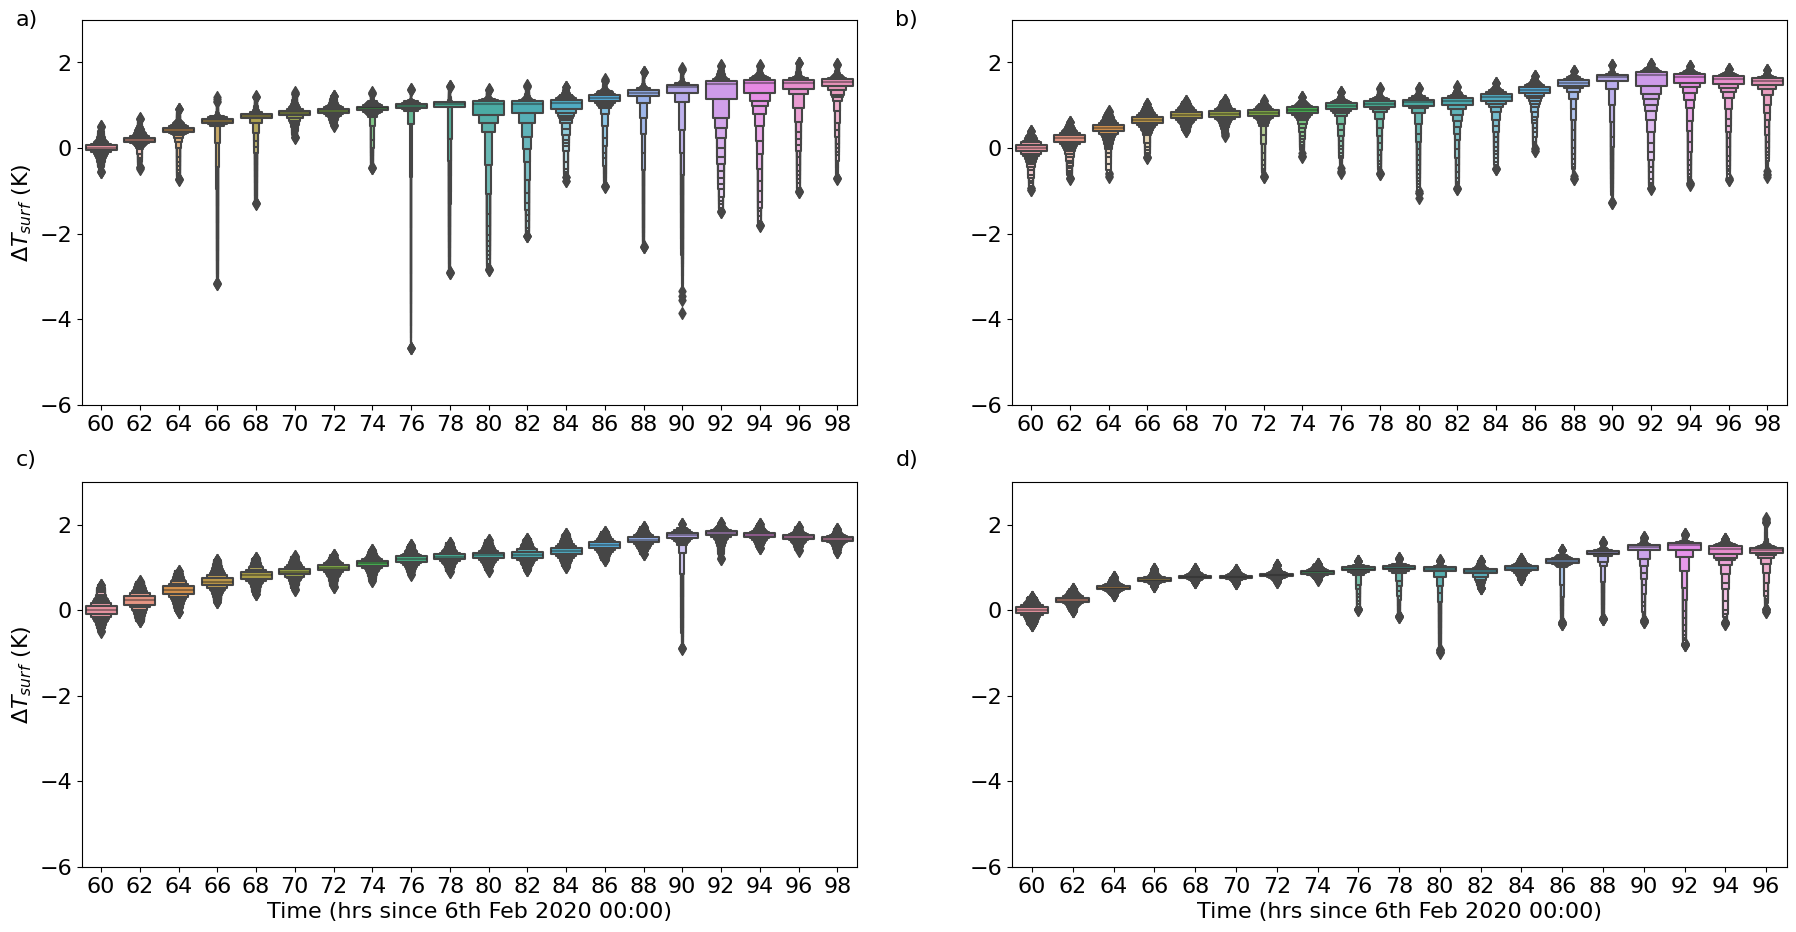

In [15]:
pl.rcParams['xtick.labelsize'] = 16
pl.rcParams['ytick.labelsize'] = 16
pl.rcParams['axes.labelsize'] = 16
pl.rcParams['axes.titlesize'] = 16
pl.rcParams['legend.fontsize'] = 16

import seaborn as sns


pl.subplots(2,2,figsize=(22, 11))

pl.subplot(2,2,1)
g=sns.boxenplot(data=df,y='thl',x='time',scale='area')
if sim=='Feb2':
    g.set(ylim=(-2.5,2))
else:
    g.set(ylim=(-6,3))
g.set(ylabel=r'$\Delta T_{surf}$ (K)')
g.set(xlabel='')

pl.subplot(2,2,2)
g=sns.boxenplot(data=df1,y='TABS',x='time',scale='area')
if sim=='Feb2':
    g.set(ylim=(-2.5,2))
else:
    g.set(ylim=(-6,3))
g.set(ylabel='')
g.set(xlabel='')

pl.subplot(2,2,3)
g=sns.boxenplot(data=df2,y='TABS1',x='time',scale='area')
if sim=='Feb2':
    g.set(ylim=(-2.5,2))
else:
    g.set(ylim=(-6,3))
g.set(ylabel=r'$\Delta T_{surf}$ (K)')
if sim=='Feb2':
    g.set(xlabel=r'Time (hrs since 31st Jan 2020 00:00)')
else:
    g.set(xlabel=r'Time (hrs since 6th Feb 2020 00:00)')

pl.subplot(2,2,4)
g=sns.boxenplot(data=df3,y='t10',x='time',scale='area')
if sim=='Feb2':
    g.set(ylim=(-2.5,2))
else:
    g.set(ylim=(-6,3))
g.set(ylabel='')
if sim=='Feb2':
    g.set(xlabel=r'Time (hrs since 31st Jan 2020 00:00)')
else:
    g.set(xlabel=r'Time (hrs since 6th Feb 2020 00:00)')
pl.figtext(0.1, 0.88, 'a)', ha='center', va='center', fontsize=16)
pl.figtext(0.1, 0.48, 'c)', ha='center', va='center', fontsize=16)
pl.figtext(0.5, 0.88, 'b)', ha='center', va='center', fontsize=16)
pl.figtext(0.5, 0.48, 'd)', ha='center', va='center', fontsize=16)
pl.savefig('/users/PFS0220/graghuna/Flower_MIP_Paper/Plots/feb9th_thl_anomalies.png',bbox_inches='tight',dpi=300)